In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv("./data/top-5000-youtube-channels.csv")

In [157]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


1. Display All Rows Except the Last 5 rows Using Head Method

In [158]:
df.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


2. Display All Rows Except the First 5 Rows Using Tail Method

In [159]:
df.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [160]:
print(f'The number of rows are: {df.shape[0]}, and the number of columns are: {df.shape[1]}')

The number of rows are: 5000, and the number of columns are: 6


4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


5. Get Overall Statistics About The Dataframe

In [162]:
pd.options.display.float_format = '{:.2f}'.format

In [163]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


6. Data Cleaning  (Replace '--'  to NaN)

In [164]:
df.replace({'--': np.nan}, inplace=True, regex=True)

In [165]:
filt = df.applymap(lambda x: x == '--')

In [166]:
filt.sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

7. Check Null Values In The Dataset

In [167]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [168]:
per_missing = df.isnull().sum()*100/len(df)
per_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

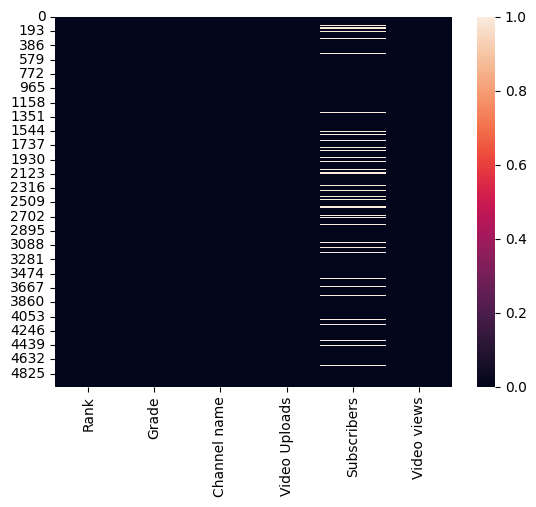

In [169]:
sns.heatmap(df.isnull());

In [170]:
df.dropna(axis=0, inplace=True) 

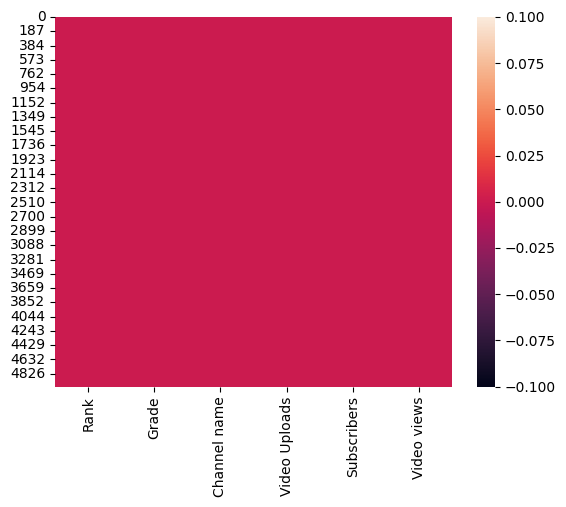

In [171]:
sns.heatmap(df.isnull());

8. Data Cleaning [ Rank Column ]

In [172]:
df.tail(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [173]:
df['Rank'] = df['Rank'].str.slice(0,-2).str.replace(',','')

In [174]:
df['Rank'] = df['Rank'].astype('int')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   object
 4   Subscribers    4610 non-null   object
 5   Video views    4610 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 234.1+ KB


9. Data Cleaning [ Video Uploads & Subscribers ]

In [176]:
df.head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591


In [177]:
df['Video Uploads'] = df['Video Uploads'].astype('int')

In [178]:
df['Subscribers'] = df['Subscribers'].astype('int')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   int32 
 4   Subscribers    4610 non-null   int32 
 5   Video views    4610 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 198.1+ KB


10. Data Cleaning [ Grade Column ]

In [180]:
df.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433
5,6,A++,Movieclips,30243,17149705,16618094724
6,7,A++,netd müzik,8500,11373567,23898730764
7,8,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9,A++,Ryan ToysReview,1140,16082927,24518098041
9,10,A++,Zee Marathi,74607,2841811,2591830307


In [181]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [182]:
grade = df['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1 })

In [183]:
df.insert(2, 'Grade_code', grade)
df.head(10)

,Rank,Grade,Grade_code,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,5,Zee TV,82757,18752951,20869786591
1,2,A++,5,T-Series,12661,61196302,47548839843
2,3,A++,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,5,SET India,27323,31180559,22675948293
4,5,A++,5,WWE,36756,32852346,26273668433
5,6,A++,5,Movieclips,30243,17149705,16618094724
6,7,A++,5,netd müzik,8500,11373567,23898730764
7,8,A++,5,ABS-CBN Entertainment,100147,12149206,17202609850
8,9,A++,5,Ryan ToysReview,1140,16082927,24518098041
9,10,A++,5,Zee Marathi,74607,2841811,2591830307


11. Find Average Views For Each Channel

In [184]:
df.columns

Index(['Rank', 'Grade', 'Grade_code', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views'],
      dtype='object')

In [185]:
df['Avg_views'] = df['Video views']/df['Video Uploads']

In [186]:
df.head(1)

,Rank,Grade,Grade_code,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,A++,5,Zee TV,82757,18752951,20869786591,252181.53


12. Find Out Top Five Channels With Maximum Number of Video Uploads

In [187]:
df.sort_values(by='Video Uploads', ascending=False).head()

,Rank,Grade,Grade_code,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,B+,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,A-,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,B+,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,A,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,B+,1,MLB,267649,1434206,1329206392,4966.23


13. Find Correlation Matrix

In [188]:
df.corr(numeric_only=True)

,Rank,Grade_code,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade_code,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Avg_views,-0.15,0.16,-0.06,0.29,0.29,1.00


14.  Which Grade Has A Maximum Number of Video Uploads?

In [203]:
df.columns

Index(['Rank', 'Grade', 'Grade_code', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views', 'Avg_views'],
      dtype='object')

In [209]:
df.groupby('Grade').mean(True)['Video Uploads']

Grade
A       5709.86
A+     16960.30
A++    37450.70
A-      4382.58
B+      3136.16
Name: Video Uploads, dtype: float64

<Axes: xlabel='Grade', ylabel='Video Uploads'>

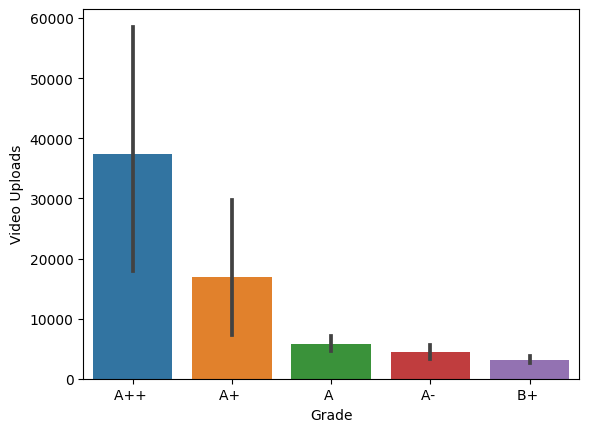

In [196]:
sns.barplot(data=df, x='Grade', y='Video Uploads')

15.Which Grade Has The Highest Average Views?

In [197]:
df.columns

Index(['Rank', 'Grade', 'Grade_code', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views', 'Avg_views'],
      dtype='object')

In [210]:
df.groupby('Grade').mean(True)['Avg_views']

Grade
A      10540908.45
A+     11577080.32
A++     5688267.96
A-      5254804.04
B+      3280380.88
Name: Avg_views, dtype: float64

<Axes: xlabel='Grade', ylabel='Avg_views'>

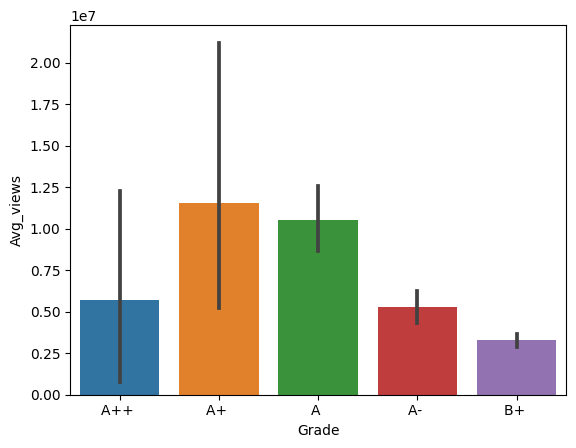

In [198]:
sns.barplot(data=df, x='Grade', y='Avg_views')

16.  Which Grade Has The Highest Number of Subscribers? 

In [199]:
df.columns

Index(['Rank', 'Grade', 'Grade_code', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views', 'Avg_views'],
      dtype='object')

In [211]:
df.groupby('Grade').mean(True)['Subscribers']

Grade
A       5107136.29
A+     11726947.47
A++    22281762.50
A-      2798520.38
B+      1535207.95
Name: Subscribers, dtype: float64

<Axes: xlabel='Grade', ylabel='Subscribers'>

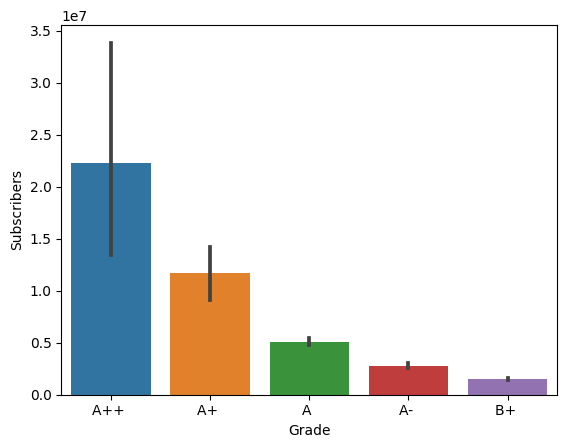

In [200]:
sns.barplot(data=df, x='Grade', y='Subscribers')

17. Which Grade Has The Highest Video Views?

In [193]:
df.columns

Index(['Rank', 'Grade', 'Grade_code', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views', 'Avg_views'],
      dtype='object')

In [212]:
df.groupby('Grade').mean(True)[ 'Video views']

Grade
A       2497972949.11
A+      6168741772.73
A++    21199091192.80
A-      1102450027.69
B+       555183839.09
Name: Video views, dtype: float64

<Axes: xlabel='Grade', ylabel='Video views'>

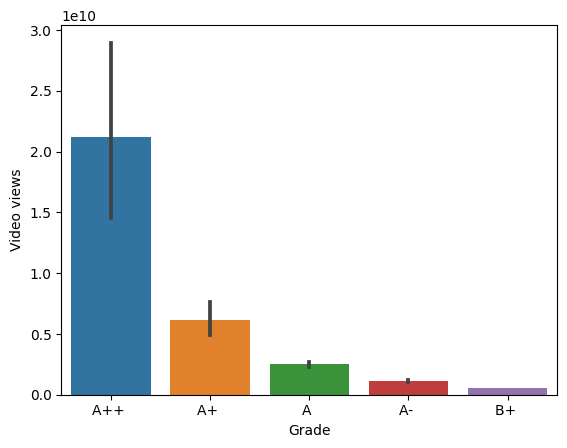

In [201]:
sns.barplot(data=df, x='Grade', y='Video views')